## Creating Decision Tree Model for Heart Disease Dataset

## Preprocessing

In [8]:
# Import our dependencies
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Read the Heart_Disease_Prediction.csv file from the Resources folder into a Pandas DataFrame
#file_path = Path("Heart_Disease_Prediction.csv") - use for Google Colab
autism = "cleaned_train.csv"

df_autism = pd.read_csv(autism)

df_autism[0:5]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_residence_United States,country_of_residence_Viet Nam,used_app_before_no,used_app_before_yes,test_taker_?,test_taker_Health care professional,test_taker_Others,test_taker_Parent,test_taker_Relative,test_taker_Self
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:

# Split our preprocessed data into our features and target arrays
target = df_autism['Autism_Diagnosis']
features = df_autism.drop('Autism_Diagnosis', axis=1)
features_name = features.columns
features.head()

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled= ROS.fit_resample(X_train_scaled, y_train)

## Fit the Decision Tree Model

In [11]:
# Create a random forest classifier
DT_model = tree.DecisionTreeClassifier(random_state=78)

In [12]:
# Import the kerastuner library
DT_model = DT_model.fit(X_resampled, y_resampled)

Making Predictions using Decision Tree

In [13]:
# Making predictions using the testing data
predictions = DT_model.predict(X_test_scaled)

Decision Tree Evaluation

In [14]:
# Get best model hyperparameters
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,146,21
Actual 1,12,21


Accuracy Score : 0.835
Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       167
         1.0       0.50      0.64      0.56        33

    accuracy                           0.83       200
   macro avg       0.71      0.76      0.73       200
weighted avg       0.85      0.83      0.84       200



In [16]:
# Decision Tree in sklearn automatically calculates feature importance
importances = DT_model.feature_importances_
# Sort the features by their importance
sorted(zip(DT_model.feature_importances_, features.columns), reverse=True)

[(0.3275121420113689, 'A9_Score'),
 (0.14344115480818745, 'ASQ_Total_score'),
 (0.10291450792759489, 'age'),
 (0.057017196733554126, 'A3_Score'),
 (0.03976596409570292, 'A6_Score'),
 (0.03893285883973312, 'A4_Score'),
 (0.03251112475065215, 'A7_Score'),
 (0.027655198481586273, 'jaundice_at_birth_no'),
 (0.020724244248185177, 'ethnicity_Black'),
 (0.02010183904501102, 'country_of_residence_New Zealand'),
 (0.016442123724489797, 'country_of_residence_United States'),
 (0.014277932257707364, 'test_taker_Parent'),
 (0.012638743998743658, 'country_of_residence_United Kingdom'),
 (0.011970794447046896, 'ethnicity_Others'),
 (0.011013862781954887, 'A5_Score'),
 (0.010573308270676695, 'A10_Score'),
 (0.010129452449777815, 'A2_Score'),
 (0.009051830395661271, 'austim_yes'),
 (0.007832080200501253, 'country_of_residence_Viet Nam'),
 (0.0075082229975874815, 'ethnicity_Hispanic'),
 (0.007222345886646446, 'ethnicity_South Asian'),
 (0.0070488721804511266, 'test_taker_Self'),
 (0.006800733161520143,

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

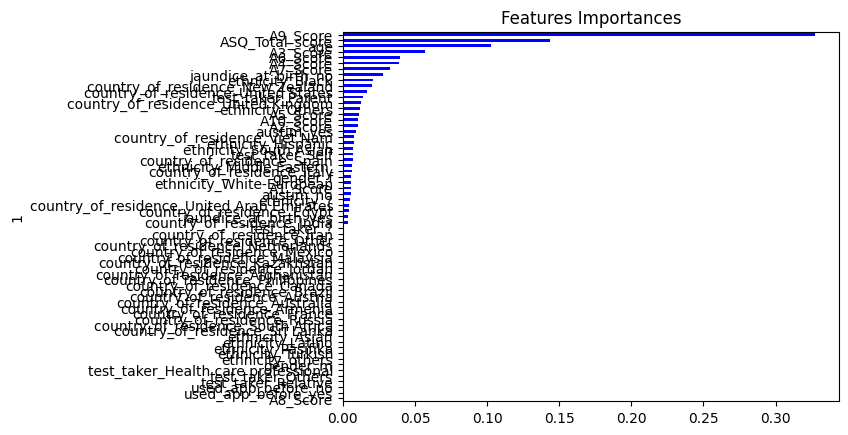

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(DT_model.feature_importances_, features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)

<Axes: title={'center': 'Top 10 Feature Importances'}, ylabel='1'>

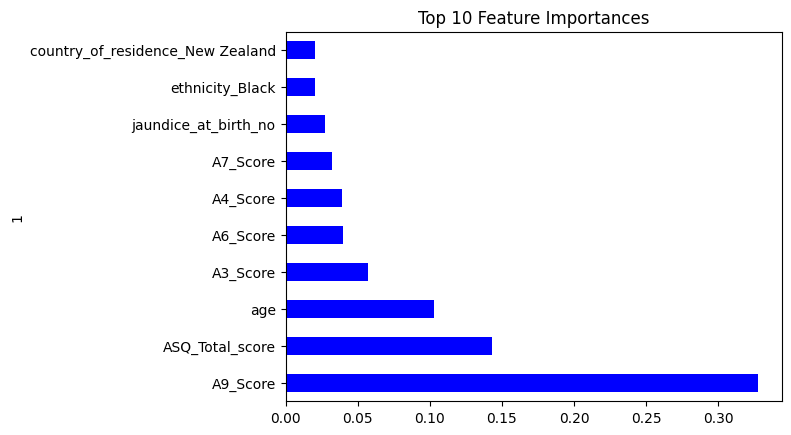

In [21]:


# Sort the feature importances in descending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=False)

# Select only the top 10 important features
top_10_importances = importances_sorted.head(10)

# Plot the top 10 features' importances
top_10_importances.plot(kind='barh', color='blue', title='Top 10 Feature Importances', legend=False)